In [3]:
import numpy as np
import pandas as pd
from arch.unitroot import ADF
import statsmodels.tsa.api as smt
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.compat import lzip
abspath = '/Users/alexcappadona/Downloads/'
data = pd.read_excel(abspath + 'GasolineSpotFutures2020.xlsx', index_col=0)
data.head()

,futures,spot
date,,
2010-01-04,2.104,2.096
2010-01-05,2.125,2.114
2010-01-06,2.137,2.130
2010-01-07,2.135,2.126
2010-01-08,2.155,2.155


In [4]:
data.tail()

,futures,spot
date,,
2020-12-24,1.379,1.413
2020-12-28,1.368,1.396
2020-12-29,1.388,1.417
2020-12-30,1.412,1.438
2020-12-31,1.408,1.438


In [5]:
data.describe()

,futures,spot
count,2752.000000,2752.000000
mean,2.078844,2.070923
std,0.648519,0.636765
min,0.412000,0.434000
25%,1.557000,1.561000
50%,1.995000,1.967000
75%,2.702000,2.711000
max,3.465000,3.665000


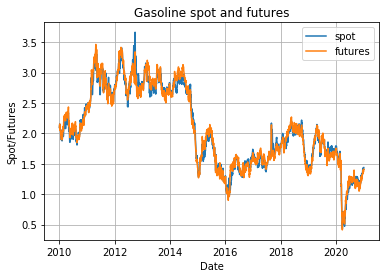

In [6]:
plt.figure(1)
plt.plot(data['spot'], label='spot')
plt.plot(data['futures'], label='futures')
plt.xlabel('Date')
plt.ylabel('Spot/Futures')
plt.title('Gasoline spot and futures')
plt.grid(True)
plt.legend()
plt.show()

In [7]:
# compute log returns
data['p1']=np.log(data['futures'])
data['p2']=np.log(data['spot'])
data['dp1']=data['p1'].diff()
data['dp2']=data['p2'].diff()
data=data.dropna()
data.head()

,futures,spot,p1,p2,dp1,dp2
date,,,,,,
2010-01-05,2.125,2.114,0.753772,0.748582,0.009932,0.008551
2010-01-06,2.137,2.130,0.759403,0.756122,0.005631,0.007540
2010-01-07,2.135,2.126,0.758467,0.754242,-0.000936,-0.001880
2010-01-08,2.155,2.155,0.767791,0.767791,0.009324,0.013548
2010-01-11,2.143,2.134,0.762207,0.757998,-0.005584,-0.009793


In [8]:
# Are the prices stationary?
# DickyFuller test
res1 = ADF(data['p1'],lags=10)
print(res1.summary())
res2 = ADF(data['p2'],lags=10)
print(res2.summary())
# unit root --> not stationary
# cannot reject the null that either test has unit root and therefore is not stationary
# which is what we'd expect since prices follow a random walk

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.204
P-value                         0.205
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -2.248
P-value                         0.189
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [9]:
# cointegration test:
# to do so we must regress one price on the other and get residuals for cointergration test

# regressing p1 on p2 (if switched, result would be the same)
formula = 'p1 ~ p2'
results = smf.ols(formula, data).fit()
print(results.summary())
residuals = results.resid

                            OLS Regression Results                            
Dep. Variable:                     p1   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.504e+05
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:34:59   Log-Likelihood:                 4637.0
No. Observations:                2751   AIC:                            -9270.
Df Residuals:                    2749   BIC:                            -9258.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0085      0.002      4.396      0.0

In [10]:
# see if the residuals are stationary (cointegration test)

res = ADF(residuals,lags=10)
print(res.summary())
# reject the null, the residuals are stationary

   Augmented Dickey-Fuller Results   
Test Statistic                 -6.903
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [11]:
# check if the returns are stationary
res1a = ADF(data['dp1'],lags=10)
print(res1a.summary())
res2a = ADF(data['dp2'],lags=10)
print(res2a.summary())

# both are clearly stationary

   Augmented Dickey-Fuller Results   
Test Statistic                -14.471
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                -14.187
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


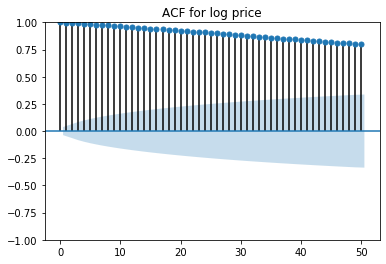

In [12]:
# Correlogram for the price
smt.graphics.plot_acf(data['p1'],lags=50)
plt.title('ACF for log price') #autocorrelation function (ACF)
plt.show()

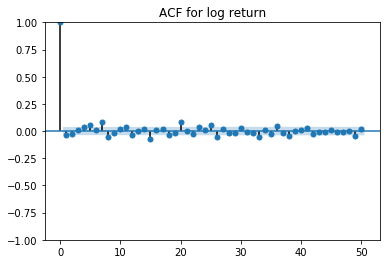

In [13]:
# Correlogram for the returns for the futures
smt.graphics.plot_acf(data['dp1'],lags=50)
plt.title('ACF for log return') #autocorrelation function (ACF)
plt.show()

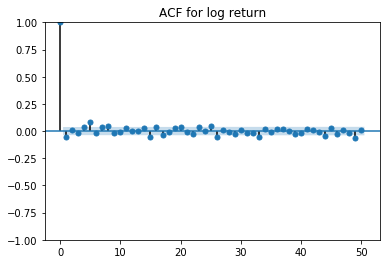

In [14]:
# Correlogram for the returns for the spot
smt.graphics.plot_acf(data['dp2'],lags=50)
plt.title('ACF for log return') #autocorrelation function (ACF)
plt.show()

In [15]:
# Ljung-Box autocorrelation test (futures return)
name = ['Ljung-Box statistic','p-value']
test = sms.acorr_ljungbox(data['dp1'], lags=10)
lzip(name,test)
# shows results for lags 1-10, jointly
# if p-value small, we do have statistically sig autocorrelation

[('Ljung-Box statistic', 'lb_stat'), ('p-value', 'lb_pvalue')]

In [16]:
# Ljung-Box autocorrelation test (spot return)
name = ['Ljung-Box statistic','p-value']
test = sms.acorr_ljungbox(data['dp2'], lags=10)
lzip(name,test)

[('Ljung-Box statistic', 'lb_stat'), ('p-value', 'lb_pvalue')]

In [17]:
data['dp1'].corr(data['dp2']) #correlation across the two markets (spot aand future returns)
# pretty high, statistically sig even w/o a p-value

0.8092572298167984

In [18]:
data1 = data.drop(['spot','futures','dp1','dp2'], axis=1) # axis=1 meeaans columns (variable) that you want to drop
data1.head()

,p1,p2
date,,
2010-01-05,0.753772,0.748582
2010-01-06,0.759403,0.756122
2010-01-07,0.758467,0.754242
2010-01-08,0.767791,0.767791
2010-01-11,0.762207,0.757998


In [19]:
# Estimate VECM
model = smt.VECM(data1, k_ar_diff=8, deterministic='co', coint_rank=1) # deterministic='co' adds an intercept to each equation
vecm_results = model.fit()
print(vecm_results.summary())
vecm_residuals = vecm_results.resid

Det. terms outside the coint. relation & lagged endog. parameters for equation p1
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.001     -0.235      0.815      -0.001       0.001
L1.p1         -0.0682      0.034     -2.018      0.044      -0.134      -0.002
L1.p2          0.0399      0.034      1.166      0.244      -0.027       0.107
L2.p1         -0.0787      0.034     -2.321      0.020      -0.145      -0.012
L2.p2          0.0578      0.034      1.680      0.093      -0.010       0.125
L3.p1          0.0107      0.034      0.315      0.753      -0.056       0.077
L3.p2         -0.0059      0.034     -0.170      0.865      -0.073       0.062
L4.p1          0.0019      0.034      0.056      0.955      -0.065       0.069
L4.p2          0.0457      0.034      1.328      0.184      -0.022       0.113
L5.p1          0.0160      0.034      0.473      

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [20]:
# gamma F (from the instructions); spot market
# ec1            0.0050      0.013      0.394      0.694      -0.020       0.030

# results show that futures market moves first; does more price discovery

# gamma S (from the instructions); futures market
# ec1            0.0582      0.012      4.709      0.000       0.034       0.082
# is statistically sig
# says if the two prices move apart more than 1%, futures will move 0.058% towards equilibrium (and it is significant)

In [21]:
vecm_residuals
# first column is futures, second is spot

array([[ 0.00838173,  0.00984555],
       [-0.00479872, -0.0119784 ],
       [-0.02993236, -0.02611036],
       ...,
       [ 0.01506224,  0.01741636],
       [ 0.0174755 ,  0.01506833],
       [-0.00106666, -0.00044268]])

In [22]:
dp1r = [column[0] for column in vecm_residuals] # first value of indx is 0
dp2r = [column[1] for column in vecm_residuals]

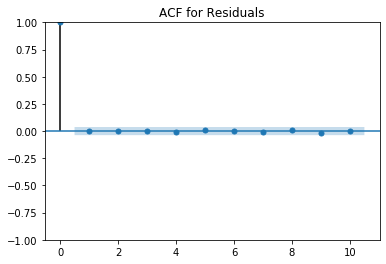

In [23]:
# Correlogram for VECM residuals
smt.graphics.plot_acf(dp1r,lags=10)
plt.title('ACF for Residuals') #autocorrelation function (ACF)
plt.show()

In [27]:
# Ljung-Box autocorrel test for residuals
name = ['Ljung-Box statistic','p-value']
test = sms.acorr_ljungbox(dp1r, lags=10)
lzip(name,test)

[('Ljung-Box statistic', 'lb_stat'), ('p-value', 'lb_pvalue')]

In [28]:
test

,lb_stat,lb_pvalue
1,0.000819,0.977167
2,0.024217,0.987964
3,0.028890,0.998705
4,0.161214,0.996921
5,0.262931,0.998283
6,0.263809,0.999653
7,0.404502,0.999727
8,0.494607,0.999872
9,1.711059,0.995257
10,1.711990,0.998109


In [25]:
name = ['Ljung-Box statistic','p-value']
test = sms.acorr_ljungbox(dp2r, lags=10)
lzip(name,test)

[('Ljung-Box statistic', 'lb_stat'), ('p-value', 'lb_pvalue')]